In [1]:
import pyrealsense2 as rs
import matplotlib.pyplot as plt
import numpy as np
import imageio
import time
import cv2
import glob

pipeline = rs.pipeline()
config = rs.config()

filenames = glob.glob('210927-145329/*.bag')



#config.enable_stream(rs.stream.depth, rs.format.z16, 30)



cv2.namedWindow("Depth Stream", cv2.WINDOW_AUTOSIZE)
colorizer = rs.colorizer()

decimation = rs.decimation_filter()
decimation.set_option(rs.option.filter_magnitude, 1)

spatial = rs.spatial_filter()
spatial.set_option(rs.option.filter_magnitude, 5)
spatial.set_option(rs.option.filter_smooth_alpha, 1)
spatial.set_option(rs.option.filter_smooth_delta, 50)
spatial.set_option(rs.option.holes_fill, 2)

i = 0
config.enable_device_from_file(filenames[0], False)
pipeline.start(config)
    
    
while True:
    
    frames = pipeline.wait_for_frames()

        # Get depth frame
    depth_frame = frames.get_depth_frame()
    
    decimated_depth = decimation.process(depth_frame)
    filtered_depth = spatial.process(decimated_depth)
        # Colorize depth frame to jet colormap
    depth_color_frame = colorizer.colorize(filtered_depth)

        # Convert depth_frame to numpy array to render image in opencv
    depth_color_image = np.asanyarray(depth_color_frame.get_data())

        # Render image in opencv window
    cv2.imshow("Depth Stream", depth_color_image)
    key = cv2.waitKey(1)
        # if pressed escape exit program
    i+=1
    #pipeline.stop()
    if key == 27:
        cv2.destroyAllWindows()
        break
            
            


RuntimeError: Frame didn't arrive within 5000

In [1]:
def extract_tiff_from_bag(filename, destination):
    pipeline = rs.pipeline()
    config = rs.config()
    config.enable_device_from_file(filename, False)
    pipeline.start(config)

        
    
    
    decimation = rs.decimation_filter()
    decimation.set_option(rs.option.filter_magnitude, 1)

    spatial = rs.spatial_filter()
    spatial.set_option(rs.option.filter_magnitude, 5)
    spatial.set_option(rs.option.filter_smooth_alpha, 1)
    spatial.set_option(rs.option.filter_smooth_delta, 50)
    spatial.set_option(rs.option.holes_fill, 2)

    i = 0
    stop = True
    while True:
        try:
            frames = pipeline.wait_for_frames()
            depth_frame = frames.get_depth_frame()
            
            decimated_depth = decimation.process(depth_frame)
            filtered_depth = spatial.process(decimated_depth)
            depth_image = np.asanyarray(filtered_depth.get_data())
            imageio.imwrite(destination+f'{i}.tif', depth_image, 'TIFF')
            time.sleep(0.01)
            i+=1
            
        except RuntimeError:
            pipeline.stop()
            stop = False
            break
    
    if stop == True:
        pipeline.stop()
    return
    
    

In [2]:
import pyrealsense2 as rs
import matplotlib.pyplot as plt
import numpy as np
import imageio
import time
import cv2
import glob
import os

filenames = glob.glob('camera_test_2/*/*.bag')
# print(filenames)
destinations = []
dest_dir = 'camera_test_2_tif'
for i in range(0, len(filenames)):
    os.chdir(dest_dir)
    #os.mkdir(os.path.basename(filenames[i])[0:-4])
    destinations.append('\\Users\\zacha\\Documents\\Precision Ranching Code\\'+dest_dir+'\\'+os.path.basename(filenames[i])[0:-4])
    os.chdir('..')
    
# print(destinations)

for i in range(0, len(filenames)):
#     try:
#         os.mkdir(destinations[i])
#     except FileExistsError:
#         pass
    
    extract_tiff_from_bag(filenames[i], destinations[i])

28


ValueError: num must be 1 <= num <= 25, not 26

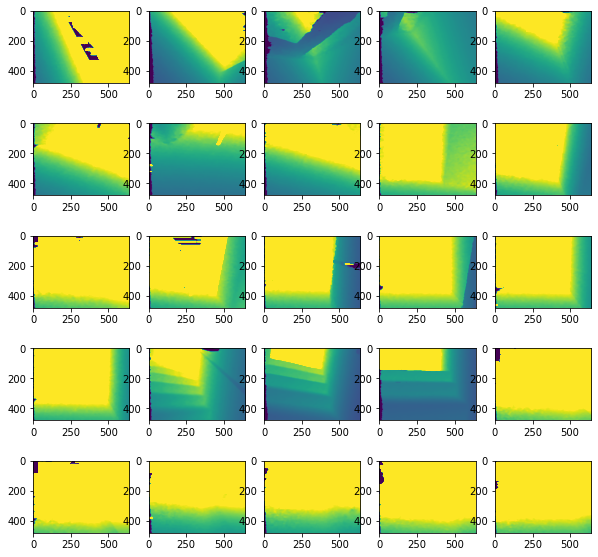

In [5]:
images = glob.glob(dest_dir+'/*.tif')
num_images = len(images)
print(num_images)

plt.figure(figsize=(10,10))

num_plot = num_images

j = 1
for i in range(1, num_images, int(num_images/num_plot)):
    plt.subplot(int(np.sqrt(num_plot)), int(np.sqrt(num_plot)), j)
    plt.imshow(imageio.imread(destinations[i]+'0.tif'), vmax = 2000)
    j+=1


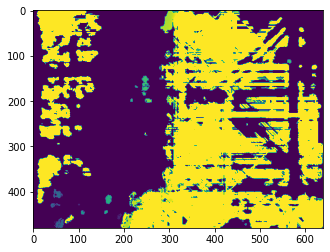

In [25]:
plt.imshow(imageio.imread('camera_test_1\\211001-153022\\No_RFID_1_D.tif'), vmax = 2000)